In [1]:
import os
import random
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from PIL import Image

In [17]:
def plot_bounding_boxes(image_path, label_path, ax):
    image = Image.open(image_path)
    ax.imshow(image)

    with open(label_path, 'r') as label_file:
        lines = label_file.readlines()

    for line in lines:
        parts = line.split(" ")
        class_id, x, y, width, height = map(float, parts)
        image_width, image_height = image.size
        x *= image_width
        y *= image_height
        width *= image_width
        height *= image_height
        rect = Rectangle((x - width / 2, y - height / 2), width, height, linewidth=2, edgecolor='red', facecolor='none')
        ax.add_patch(rect)

In [22]:
def draw_samples(ds_dir):
    images_folder = os.path.join(ds_dir, 'images')
    labels_folder = os.path.join(ds_dir, 'labels')

    image_files = os.listdir(images_folder)
    random.shuffle(image_files)

    selected_images = []
    for image_file in image_files:
        image_path = os.path.join(images_folder, image_file)
        label_path = os.path.join(labels_folder, os.path.splitext(image_file)[0] + '.txt')

        if os.path.exists(label_path) and os.path.getsize(label_path) > 0:
            selected_images.append((image_path, label_path))
            if len(selected_images) == 10:
                break

    fig, axes = plt.subplots(2, 5, figsize=(15, 6))
    axes = axes.ravel()

    for i, (image_path, label_path) in enumerate(selected_images):
        plot_bounding_boxes(image_path, label_path, axes[i])
        axes[i].set_xticks([])
        axes[i].set_yticks([])
#         axes[i].set_title(f"Image {i+1}")

    plt.tight_layout()
    plt.show()

In [23]:
!ls ../datasets/yolov8_original/valid

images       labels       labels.cache


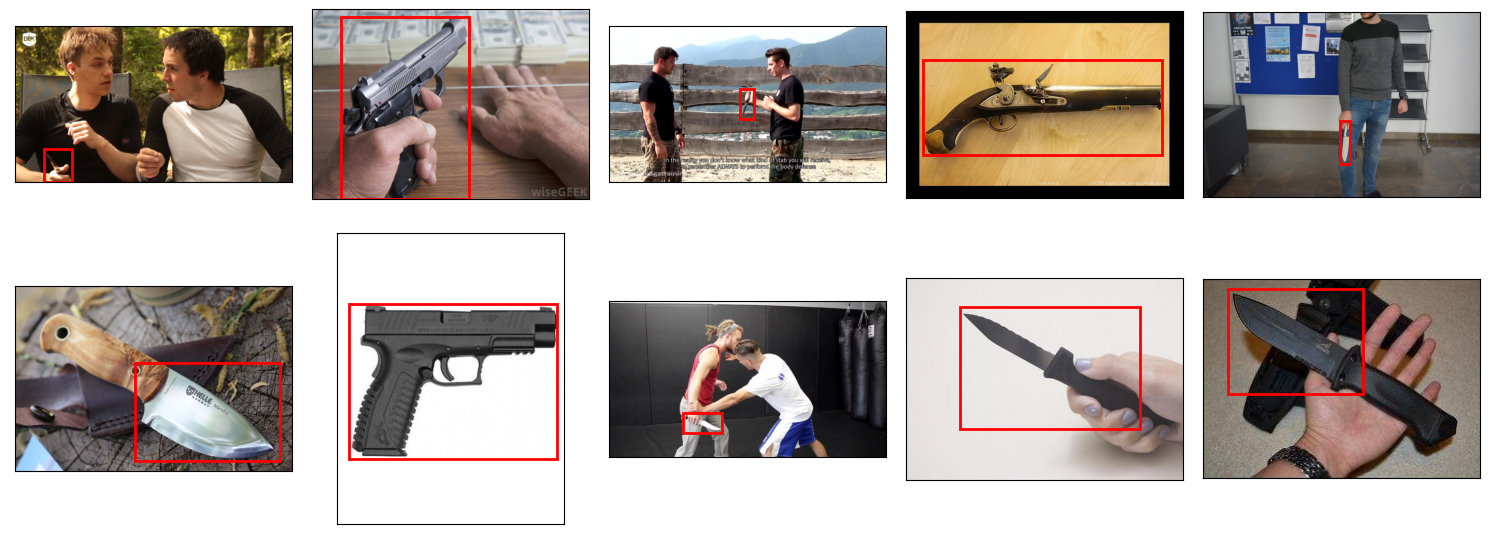

In [25]:
draw_samples("../datasets/yolov8_original/valid")

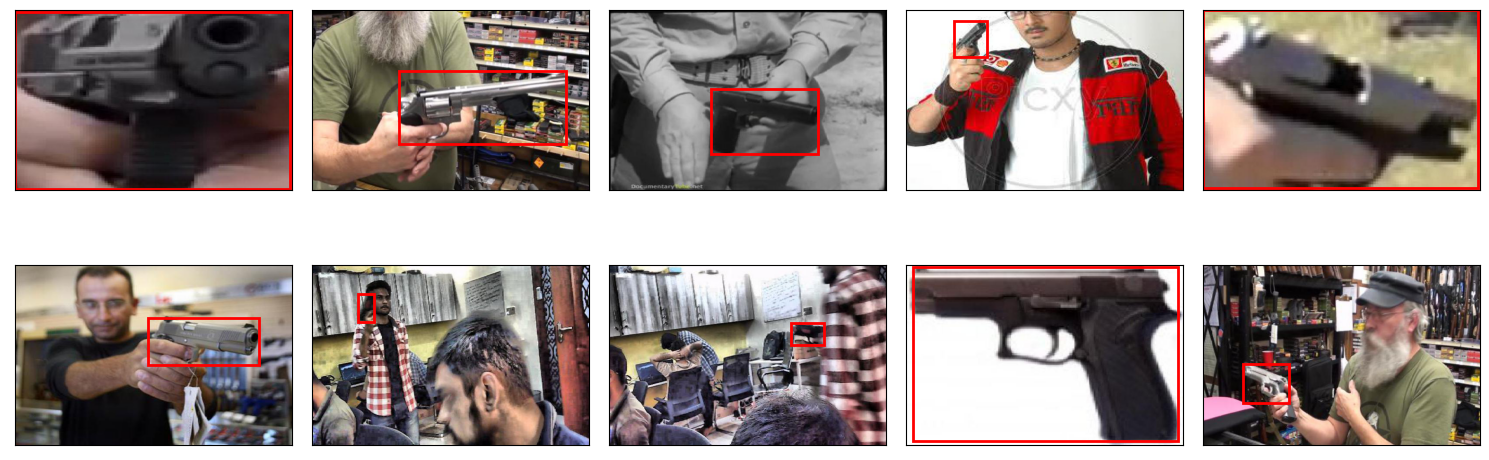

In [59]:
draw_samples("../datasets/yolov8_original_v2/valid")

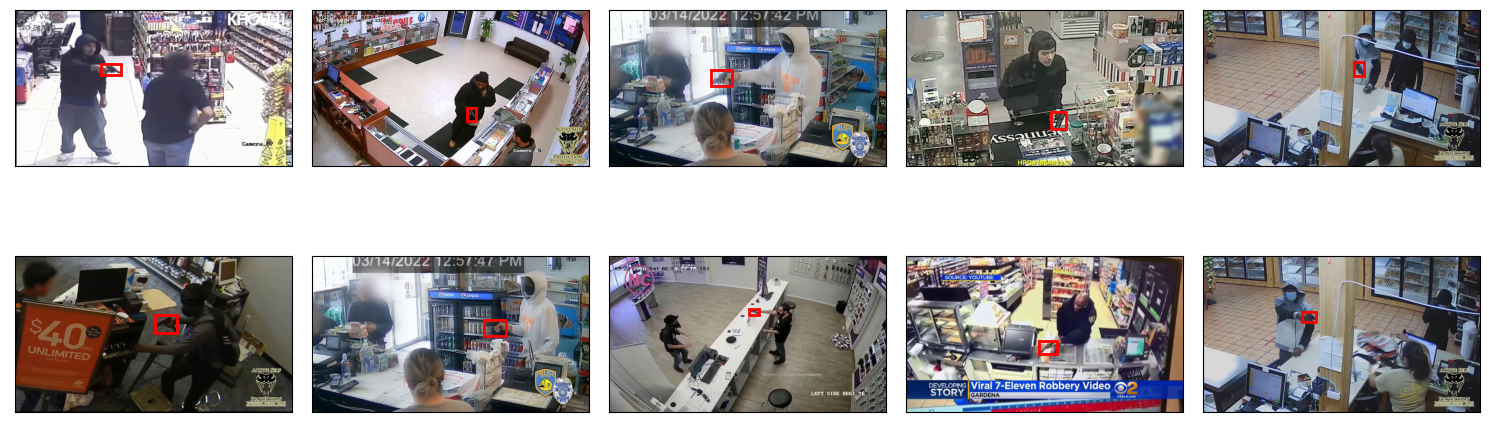

In [61]:
draw_samples("../datasets/yolov8_guns_only_no_empty/valid")